In [1]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Twitter_stock_final_dataset.csv')


In [3]:
df

,Year,Month,Day,StockName,Positive,Negative,Neutral,Total Tweets,Close,Volume,Open,High,Low,Day_of_week
0,2020,1,1,apple,10,2,8,20,75.0875,135647440.0,74.0600,75.1500,73.7975,Wednesday
1,2020,1,1,microsoft,9,0,11,20,160.6200,22634550.0,158.7800,160.7300,158.3300,Wednesday
2,2020,1,1,tesla,17,3,3,23,86.0520,47791930.0,84.9000,86.1391,84.3420,Wednesday
3,2020,1,1,nvidia,1,0,0,1,59.9775,23767876.0,59.6875,59.9775,59.1800,Wednesday
4,2020,1,1,paypal,1,0,1,2,110.7500,7419283.0,109.4700,111.2100,109.2750,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2021,9,20,tesla,61,21,39,121,730.1700,24757650.0,734.5577,742.0000,718.6249,Monday
2979,2021,9,20,nvidia,3,4,3,10,211.1300,34944050.0,211.4600,214.3300,206.6200,Monday
2980,2021,9,20,paypal,1,1,2,4,269.9100,7728307.0,271.5500,273.0000,265.6800,Monday
2981,2021,9,21,nvidia,4,4,1,9,212.4600,20468810.0,214.1650,214.2500,209.5000,Tuesday


In [112]:
df2 =df
Date = ['Year', 'Month','Day']
df2.sort_values(by = Date, inplace = True, ascending = True)

In [94]:
cols = ['Close', 'High', 'Low', 'Volume','Open','Day_of_week']
X_reg2 = df2.drop(cols, axis = 1).values
y_reg2 = df2.Close.values

In [95]:
df_X = pd.DataFrame(X_reg2)#, columns=['Column1', 'Column2'] 
df_X.head()

,0,1,2,3,4,5,6,7
0,2020,1,1,apple,10,2,8,20
1,2020,1,1,microsoft,9,0,11,20
2,2020,1,1,tesla,17,3,3,23
3,2020,1,1,nvidia,1,0,0,1
4,2020,1,1,paypal,1,0,1,2


In [96]:
#LABEL ENCODE
# Encoding the Independent or ohject variable Day_of_week
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

regEnc = LabelEncoder()

#X_reg2[:, -1] = regEnc.fit_transform(X_reg2[:, -1]) #Day_of_week

X_reg2[:, 3] = regEnc.fit_transform(X_reg2[:, 3]) #stockName

In [97]:
Xtrain_set, Xtest_set= np.split(X_reg2, [int(0.8 * len(X_reg2))])

ytrain_set, ytest_set= np.split(y_reg2, [int(0.8 * len(y_reg2))])

In [98]:
print('X shapes for train and test are: ',Xtrain_set.shape, Xtest_set.shape, 'respectively')
print('X shapes for train and test are: ',ytrain_set.shape, ytest_set.shape, 'respectively')

X shapes for train and test are:  (2386, 8) (597, 8) respectively
X shapes for train and test are:  (2386,) (597,) respectively


In [109]:

reg = GradientBoostingRegressor(random_state=0)
reg.fit(Xtrain_set, ytrain_set)
reg.predict(Xtest_set[1:2])
reg.score(Xtest_set, ytest_set)

0.939102299137446

In [110]:
y_Lpred = reg.predict(Xtest_set)

In [111]:
import math
from sklearn import metrics
mse =np.square(np.subtract(ytest_set, y_Lpred)).mean()
rmse = math.sqrt(mse)
print('rmse: ', rmse)

rmse:  46.95613406920091


In [113]:
print('Mean absolute error: ', metrics.mean_absolute_error(ytest_set, y_Lpred))

Mean absolute error:  37.14552939178655


In [114]:
print('The r2_score: ', metrics.r2_score(ytest_set, y_Lpred))

The r2_score:  0.939102299137446


In [115]:
result = pd.DataFrame({'Actual': ytest_set.flatten(), 'Predicted': y_Lpred.flatten()})
result

,Actual,Predicted
0,126.543333,132.252501
1,248.910000,239.234661
2,597.920000,661.482240
3,154.052500,146.578308
4,254.355000,258.657408
...,...,...
592,730.170000,669.157763
593,211.130000,157.116780
594,269.910000,269.452966
595,212.460000,157.116780


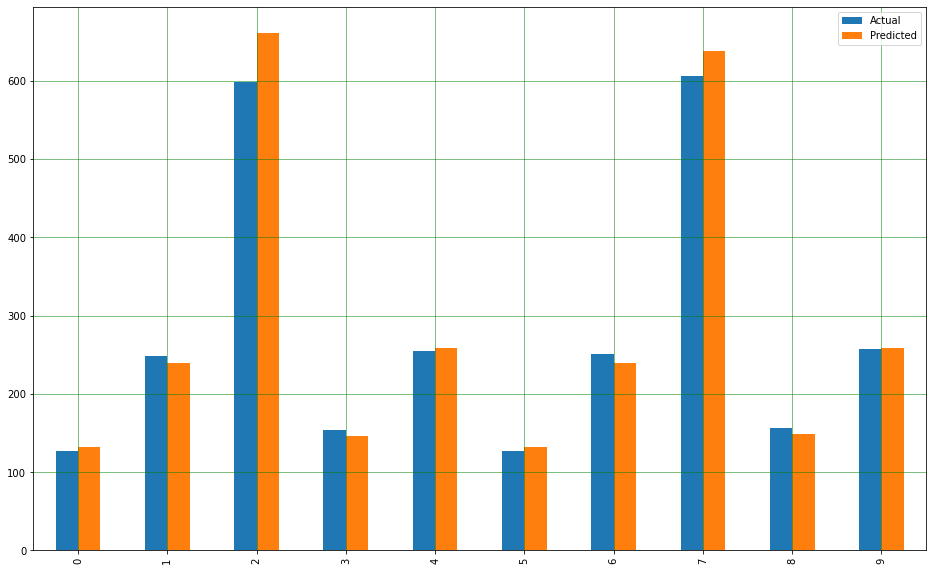

In [123]:
result2 = result.head(10)
result2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()